In [1]:
from simulator.utils import *
from detector.utils import *
from detector.detector import *
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# img_size = 2236
img_size = 100
N = 2000 # number of training data


Distribution of Intensity in a Subplot
--------------------------------
1. generate a number of signals with and without atom
2. choose a box around the center
3. plot histogram for intensity
4. create plot for each SNR
5. find threshold line as a function of SNR
6. plot fidelity by applying the model to a set of testing data

In [3]:
# 1

prev_time = time.time()

x0 = img_size // 2 
y0 = img_size // 2 
sim = simulator(img_size, 1)

data_tr_for_different_snr = []
labels_tr_for_different_snr = []
SNR = np.linspace(0.1, 2, 20)
for snr in SNR:
    data_tr = []
    labels_tr = []
    for i in range(N):
        r = np.random.rand()
        if r > 0.5: 
            labels_tr.append(1)
            data = sim.create_simulation_from_SNR(x0, y0, snr)
            data_tr.append(data)
        else:
            labels_tr.append(0)
            data = sim.create_simulation_from_SNR(x0, y0, snr, no_atom=True)
            data_tr.append(data)
    data_tr_for_different_snr.append(np.array(data_tr))
    labels_tr_for_different_snr.append(np.array(labels_tr))

print(f"time used: {time.time() - prev_time}")


time used: 48.255433082580566


In [4]:
data_tr_for_different_snr = np.array(data_tr_for_different_snr)
labels_tr_for_different_snr = np.array(labels_tr_for_different_snr)

print(data_tr_for_different_snr.shape)
print(labels_tr_for_different_snr.shape)

(20, 2000, 100, 100)
(20, 2000)


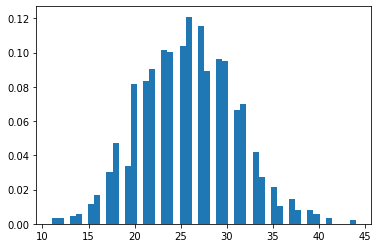

Training accuracy: 0.5440298507462686
Validation accuracy: 0.5712121212121212
Threshold: 21.3125
SNR: 0.1


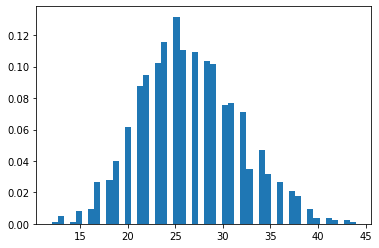

Training accuracy: 0.5932835820895522
Validation accuracy: 0.6484848484848484
Threshold: 24.8
SNR: 0.2


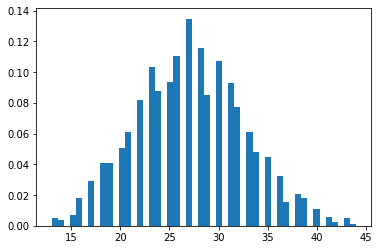

Training accuracy: 0.6574626865671642
Validation accuracy: 0.6954545454545454
Threshold: 27.46666666666667
SNR: 0.3


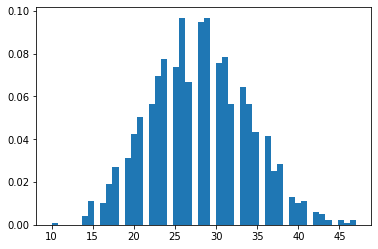

Training accuracy: 0.7119402985074627
Validation accuracy: 0.7136363636363636
Threshold: 28.5
SNR: 0.4


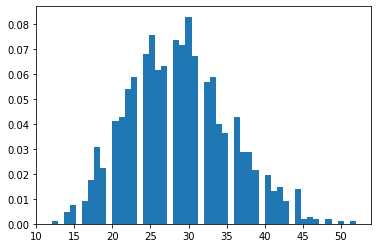

Training accuracy: 0.7477611940298508
Validation accuracy: 0.7560606060606061
Threshold: 28.842105263157894
SNR: 0.5


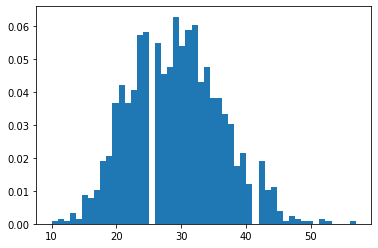

Training accuracy: 0.8119402985074626
Validation accuracy: 0.8090909090909091
Threshold: 28.39130434782609
SNR: 0.6


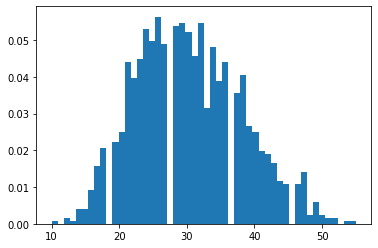

Training accuracy: 0.8462686567164179
Validation accuracy: 0.8333333333333334
Threshold: 28.40909090909091
SNR: 0.7


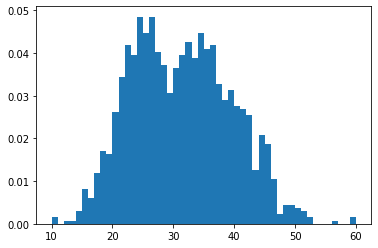

Training accuracy: 0.8656716417910447
Validation accuracy: 0.8621212121212121
Threshold: 30.833333333333336
SNR: 0.7999999999999999


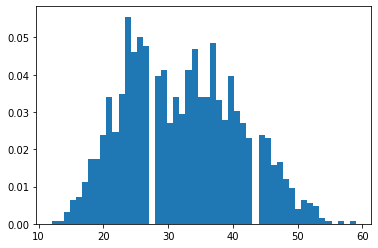

Training accuracy: 0.8902985074626866
Validation accuracy: 0.906060606060606
Threshold: 32.434782608695656
SNR: 0.8999999999999999


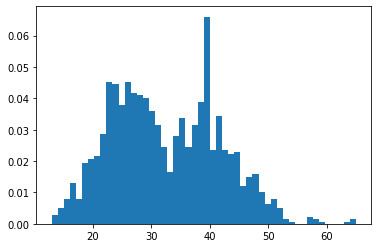

Training accuracy: 0.914179104477612
Validation accuracy: 0.8909090909090909
Threshold: 31.72
SNR: 0.9999999999999999


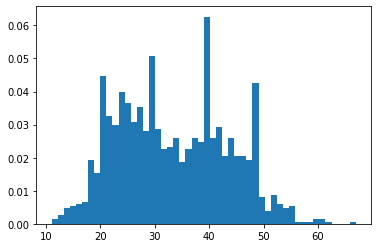

Training accuracy: 0.9238805970149254
Validation accuracy: 0.9257575757575758
Threshold: 33.81481481481481
SNR: 1.0999999999999999


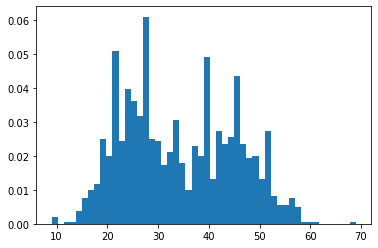

Training accuracy: 0.9343283582089552
Validation accuracy: 0.95
Threshold: 33.827586206896555
SNR: 1.2


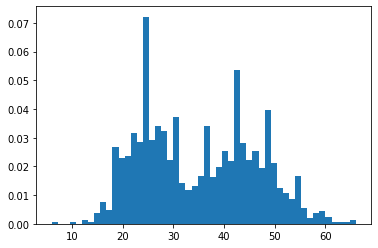

Training accuracy: 0.9522388059701492
Validation accuracy: 0.956060606060606
Threshold: 32.896551724137936
SNR: 1.3


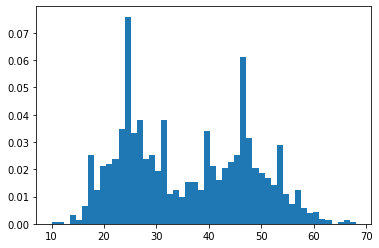

Training accuracy: 0.9679104477611941
Validation accuracy: 0.9757575757575757
Threshold: 34.85714285714286
SNR: 1.4


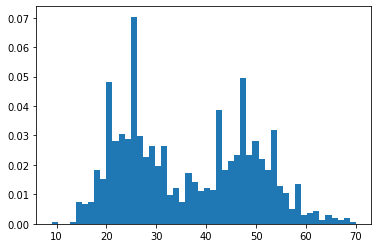

Training accuracy: 0.9723880597014926
Validation accuracy: 0.9742424242424242
Threshold: 35.43333333333333
SNR: 1.5


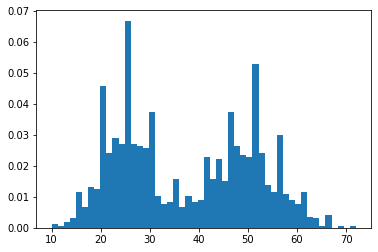

Training accuracy: 0.9626865671641791
Validation accuracy: 0.9681818181818181
Threshold: 38.93333333333334
SNR: 1.5999999999999999


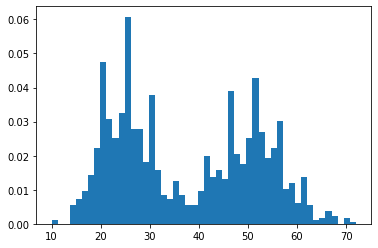

Training accuracy: 0.9791044776119403
Validation accuracy: 0.9803030303030303
Threshold: 34.800000000000004
SNR: 1.7


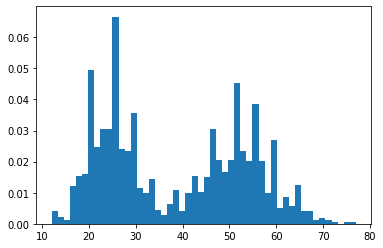

Training accuracy: 0.9902985074626866
Validation accuracy: 0.9833333333333333
Threshold: 36.375
SNR: 1.8


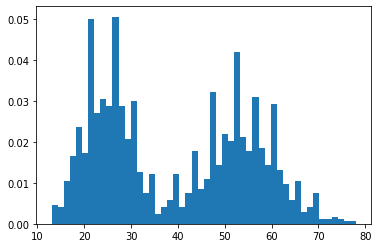

Training accuracy: 0.9843283582089553
Validation accuracy: 0.990909090909091
Threshold: 35.34375
SNR: 1.9


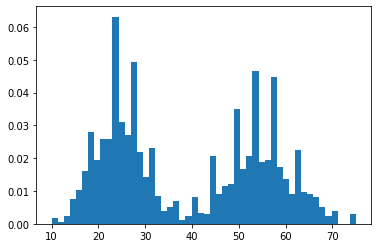

Training accuracy: 0.9917910447761195
Validation accuracy: 0.9924242424242424
Threshold: 38.4375
SNR: 2.0
time elapsed: 24.831427335739136


In [5]:
# 2, 3
thresholds = []
accuracies_tr = []
accuracies_val = []
clfs = []

dx = dy = int(2 * np.sqrt(simulator.variance))+1
# dx = dy = 
x0 = y0 = (img_size - dx) // 2

prev_time = time.time()
for i in range(data_tr_for_different_snr.shape[0]):
    
    clf = detector(img_size, x0, y0, dx, dy)
    accuracy_tr, accuracy_val, thresh = clf.train(data_tr_for_different_snr[i], labels_tr_for_different_snr[i], verbose=True)
    print(f"SNR: {SNR[i]}")
    thresholds.append(clf.thresh)
    clfs.append(clf)
    accuracies_tr.append(accuracy_tr)
    accuracies_val.append(accuracy_val)
print(f"time elapsed: {time.time() - prev_time}")

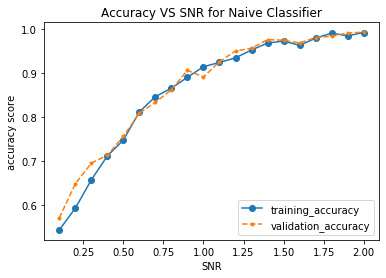

In [6]:
plt.plot(SNR, accuracies_tr, marker='o')
plt.plot(SNR, accuracies_val, marker='.', linestyle='--')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.xlabel("SNR")
plt.ylabel("accuracy score")
plt.title("Accuracy VS SNR for Naive Classifier")
plt.show()

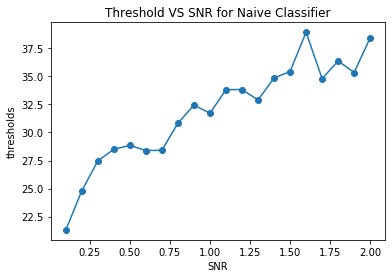

In [7]:
plt.plot(SNR, thresholds, marker='o')
plt.xlabel("SNR")
plt.ylabel("thresholds")
plt.title("Threshold VS SNR for Naive Classifier")
plt.show()

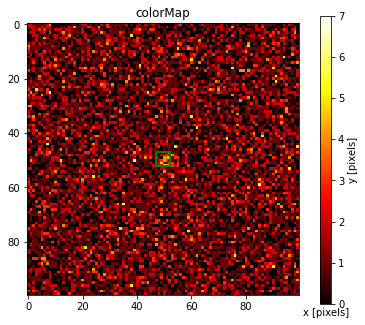

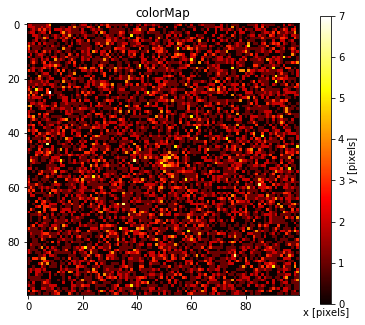

1


In [19]:
idx=5

snr_idx = -1
a = data_tr_for_different_snr[snr_idx][idx]
b = labels_tr_for_different_snr[snr_idx][idx]
# print(clf)
clf = clfs[snr_idx]
clf.visualize_data(a)
visualize(a)
print(b)
# print(a[51])

Fidelity VS threshold position plot for different values of SNR1 with Fixed Box Size: SNR1 == peak_intensity / background
-----------------------------------------------------------

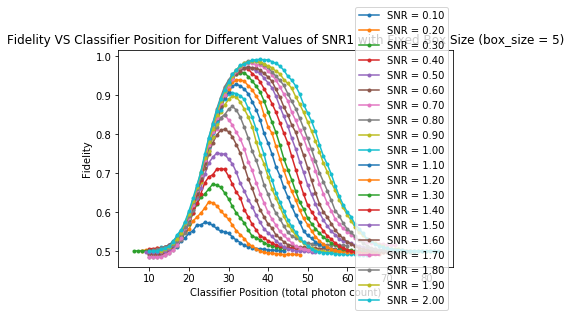

In [9]:
from sklearn.metrics import accuracy_score

legends = []
box_size = 5
x0 = y0 = (img_size - box_size) // 2
clf = detector(img_size, x0, y0, box_size, box_size)
    # iterate through data_tr
    # find the min and max box sum for all samples in a snr batch
    # iterate through it, predict to get accuracy
    # store accuracy, store thresh_pos
    # plot
for i in range(data_tr_for_different_snr.shape[0]):
    data_tr = data_tr_for_different_snr[i]
    labels_tr = labels_tr_for_different_snr[i]
    sums = []
    for d in data_tr:
        box = d[x0:x0+box_size, y0:y0+box_size]
        s = np.sum(box)
        sums.append(s)
    min_sum = int(np.min(sums))
    max_sum = int(np.max(sums))
    accuracies = []
    thresh_pos = range(min_sum, max_sum+1)
    for j in thresh_pos:
        clf.thresh = j
        labels_pred = clf.predict(data_tr)
        accuracies.append(accuracy_score(labels_tr, labels_pred))
    plt.plot(thresh_pos, accuracies, marker='.')
    legends.append("SNR = {:0.2f}".format(SNR[i]))
plt.xlabel("Classifier Position (total photon count)")
plt.ylabel("Fidelity")
plt.title("Fidelity VS Classifier Position for Different Values of SNR1 with Fixed Box Size (box_size = 5)")
plt.legend(legends, loc='right')

plt.show()


Fidelity vs Threshold Position plot for Different Box Size with Fixed SNR (SNR = 1)
----------------------------------------------------------------------

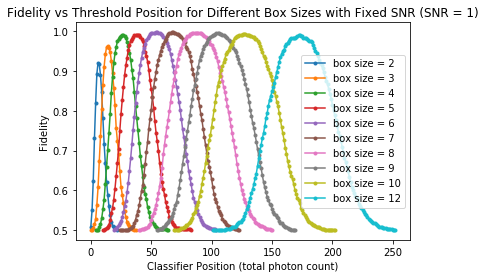

In [10]:
box_sizes = np.linspace(2, 12, 10)
data_tr = data_tr_for_different_snr[-1]
labels_tr = labels_tr_for_different_snr[-1]
legends = []
for size in box_sizes:
    # iterate through sizes:
    # for each size, find max and min sum
    # iterate through the sum
    # compute accuracy and threshold
    # plot
    size = int(size)
    x0 = y0 = (img_size - size) // 2
    clf = detector(img_size, x0, y0, size, size)
    sums = []
    for d in data_tr:
        box = d[x0: x0+size, y0: y0+size]
        s = np.sum(box)
        sums.append(s)
    min_sum = int(np.min(sums))
    max_sum = int(np.max(sums))
    thresholds = range(min_sum, max_sum+1)
    accuracies = []
    for j in thresholds:
        clf.thresh = j
        labels_pred = clf.predict(data_tr)
        accuracy = accuracy_score(labels_tr, labels_pred)
        accuracies.append(accuracy)
    plt.plot(thresholds, accuracies, marker='.')
    legends.append(f"box size = {size}")
plt.xlabel("Classifier Position (total photon count)")
plt.ylabel("Fidelity")
plt.title("Fidelity vs Threshold Position for Different Box Sizes with Fixed SNR (SNR = 1)")
plt.legend(legends, loc="right")
plt.show()

Color Map of Optimal Fidelity as a Function of SNR1 and Box Size
--------------------------------------

In [11]:
SNR = np.linspace(0.1, 2, len(data_tr_for_different_snr))
box_sizes = range(3, len(data_tr_for_different_snr)+3) # 20 by 20 color map
# for each combination, train classifier, find accuracy

accuracies = np.zeros((len(SNR), len(box_sizes)))
for i, snr in enumerate(SNR):
    data_tr = data_tr_for_different_snr[i]
    labels_tr = labels_tr_for_different_snr[i]
    for j, size in enumerate(box_sizes):
        x0 = y0 = (img_size-size)//2
        clf = detector(img_size, x0, y0, size, size)
        clf.train(data_tr, labels_tr)
        labels_pred = clf.predict(data_tr)
        accuracy = accuracy_score(labels_tr, labels_pred)
        accuracies[i,j] = accuracy

# fig, ax = plt.subplots(1,1)
# img = ax.imshow(accuracies, cmap=plt.cm.Reds)
# ax.set_xticks(SNR)
# ax.set_xlabel("SNR")
# ax.set_yticks(box_sizes)
# ax.set_ylabel("Box Size (pixels)")
# cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 

# plt.colorbar(orientation='vertical', cax=cbaxes)
# # extent=[np.min(SNR), np.max(SNR), np.max(box_sizes), np.min(box_sizes)]
# # plt.imshow(accuracies, cmap=plt.cm.Reds)
# # plt.colorbar(orientation='vertical')
# # plt.show()

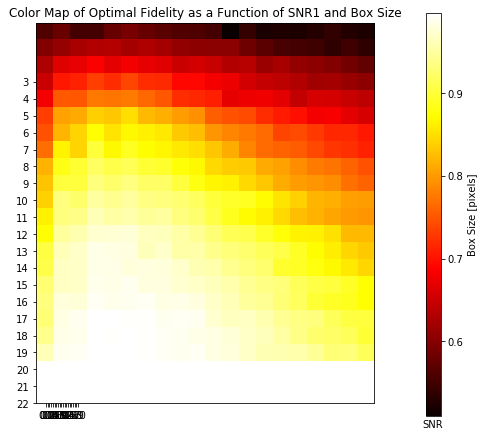

In [26]:
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111)
ax.set_title('Color Map of Optimal Fidelity as a Function of SNR1 and Box Size')
plt.imshow(accuracies, cmap='hot')
ax.set_aspect('equal')
ax.set_xticks(SNR)
ax.set_yticks(box_sizes)
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
plt.colorbar(orientation='vertical', cax=cbaxes)
plt.xlabel("SNR")
plt.ylabel("Box Size [pixels]")
# cb = plt.colorbar(ax, cax = cax)  
plt.show()
# try 
# plt.pcolor

The integral of the atom signal in a box of side length 5 is approximately 10, as seen below
-----------------------------------------------------------

In [20]:
def create_signal(x0, y0, photons_from_atom, verbose=False):       
        x = y = np.linspace(0, 100-1, 100)
        xgrid, ygrid = np.meshgrid(x, y)  
        signal = gaussian(xgrid, ygrid, x0, y0, simulator.variance) * photons_from_atom
        if verbose:
            visualize(signal)
        return signal

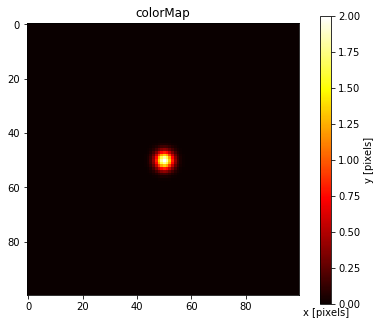

In [21]:
a = create_signal(img_size//2, img_size//2, 2, verbose=True)

In [24]:
dx = dy = 5
x0 = y0 = (img_size - dx)//2
box = a[x0: x0+dx, y0:y0+dy]
np.sum(box)

30.210767875902754

In [23]:
print(x0)
box = a[0: 101, 0:101]
np.sum(box)

39


62.83185307179587

In [15]:

#2*np.pi* variance = 10*pi